In [98]:
# Reading dataset 
import pandas as pd
df_uce = pd.read_csv('UceResultsBySchool2011-2016.csv')
df_uce

,YEAR,DISTRICT,SCHOOL,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,...,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL DIV7,MALE % DIV7,MALE TOTAL DIV9,MALE % DIV9,MALE TOTAL X,MALE % X
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,...,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,...,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,...,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,...,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,...,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


In [99]:
"""# Objectives for Anlyzing the data set(UCE Results)
1. School with the highest number of candidates at a particular year
2. District with the highest number of candidates at a particular year
3. Top 10 best performing schools in the respective years
4. Top 10 best performing districts in the respective years
5. Best performing Gender in the respective years
6. Best performed year
7. Trend of performance in the consecutive years
8. Dominant Schools in the top 10 for all the years
9. Dominant DISTRICTS in the top 10 for all the years
10. Trend of each Gender's performance in the Consecutive Years.
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Preparation, preprocessing and data cleaning
df_uce.columns

Index(['YEAR', 'DISTRICT ', 'SCHOOL', 'TOTAL CANDIDATES', 'TOTAL DIV 1',
       '% DIV 1', 'TOTAL DIV 2', '% DIV 2', 'TOTAL DIV 3', '% DIV 3',
       'TOTAL DIV 4', '% DIV 4', 'TOTAL DIV 7', '% DIV 7', 'TOTAL DIV 9',
       '% DIV 9', 'TOTAL X', '% X', 'FEMALE CANDIDATES', 'FEMALE TOTAL DIV1 ',
       'FEMALE % DIV1 ', 'FEMALE TOTAL DIV2 ', 'FEMALE % DIV2',
       'FEMALE TOTAL DIV3', 'FEMALE % DIV3', 'FEMALE TOTAL DIV4',
       'FEMALE % DIV4', 'FEMALE TOTAL DIV7', 'FEMALE % DIV7',
       'FEMALE TOTAL DIV9', 'FEMALE % DIV9', 'FEMALE TOTAL X', 'FEMALE % X ',
       'MALE CANDIDATES', 'MALE TOTAL DIV1 ', 'MALE % DIV1 ',
       'MALE TOTAL DIV2 ', 'MALE % DIV2', 'MALE TOTAL DIV3', 'MALE % DIV3',
       'MALE TOTAL DIV4', 'MALE % DIV4 ', 'MALE TOTAL DIV7 ', 'MALE % DIV7',
       'MALE TOTAL DIV9 ', 'MALE % DIV9', 'MALE TOTAL X ', 'MALE % X'],
      dtype='object')

In [101]:
# Removing white spaces in the columns.
df_uce.columns = df_uce.columns.to_series().apply(lambda x:x.strip())
df_uce.columns

Index(['YEAR', 'DISTRICT', 'SCHOOL', 'TOTAL CANDIDATES', 'TOTAL DIV 1',
       '% DIV 1', 'TOTAL DIV 2', '% DIV 2', 'TOTAL DIV 3', '% DIV 3',
       'TOTAL DIV 4', '% DIV 4', 'TOTAL DIV 7', '% DIV 7', 'TOTAL DIV 9',
       '% DIV 9', 'TOTAL X', '% X', 'FEMALE CANDIDATES', 'FEMALE TOTAL DIV1',
       'FEMALE % DIV1', 'FEMALE TOTAL DIV2', 'FEMALE % DIV2',
       'FEMALE TOTAL DIV3', 'FEMALE % DIV3', 'FEMALE TOTAL DIV4',
       'FEMALE % DIV4', 'FEMALE TOTAL DIV7', 'FEMALE % DIV7',
       'FEMALE TOTAL DIV9', 'FEMALE % DIV9', 'FEMALE TOTAL X', 'FEMALE % X',
       'MALE CANDIDATES', 'MALE TOTAL DIV1', 'MALE % DIV1', 'MALE TOTAL DIV2',
       'MALE % DIV2', 'MALE TOTAL DIV3', 'MALE % DIV3', 'MALE TOTAL DIV4',
       'MALE % DIV4', 'MALE TOTAL DIV7', 'MALE % DIV7', 'MALE TOTAL DIV9',
       'MALE % DIV9', 'MALE TOTAL X', 'MALE % X'],
      dtype='object')

In [102]:
#Replacing Column names with Underscores
df_uce.columns = df_uce.columns.str.replace(' ','_')
df_uce.columns

Index(['YEAR', 'DISTRICT', 'SCHOOL', 'TOTAL_CANDIDATES', 'TOTAL_DIV_1',
       '%_DIV_1', 'TOTAL_DIV_2', '%_DIV_2', 'TOTAL_DIV_3', '%_DIV_3',
       'TOTAL_DIV_4', '%_DIV_4', 'TOTAL_DIV_7', '%_DIV_7', 'TOTAL_DIV_9',
       '%_DIV_9', 'TOTAL_X', '%_X', 'FEMALE_CANDIDATES', 'FEMALE_TOTAL_DIV1',
       'FEMALE_%_DIV1', 'FEMALE_TOTAL_DIV2', 'FEMALE_%_DIV2',
       'FEMALE_TOTAL_DIV3', 'FEMALE_%_DIV3', 'FEMALE_TOTAL_DIV4',
       'FEMALE_%_DIV4', 'FEMALE_TOTAL_DIV7', 'FEMALE_%_DIV7',
       'FEMALE_TOTAL_DIV9', 'FEMALE_%_DIV9', 'FEMALE_TOTAL_X', 'FEMALE_%_X',
       'MALE_CANDIDATES', 'MALE_TOTAL_DIV1', 'MALE_%_DIV1', 'MALE_TOTAL_DIV2',
       'MALE_%_DIV2', 'MALE_TOTAL_DIV3', 'MALE_%_DIV3', 'MALE_TOTAL_DIV4',
       'MALE_%_DIV4', 'MALE_TOTAL_DIV7', 'MALE_%_DIV7', 'MALE_TOTAL_DIV9',
       'MALE_%_DIV9', 'MALE_TOTAL_X', 'MALE_%_X'],
      dtype='object')

In [103]:
df_uce

,YEAR,DISTRICT,SCHOOL,TOTAL_CANDIDATES,TOTAL_DIV_1,%_DIV_1,TOTAL_DIV_2,%_DIV_2,TOTAL_DIV_3,%_DIV_3,...,MALE_TOTAL_DIV3,MALE_%_DIV3,MALE_TOTAL_DIV4,MALE_%_DIV4,MALE_TOTAL_DIV7,MALE_%_DIV7,MALE_TOTAL_DIV9,MALE_%_DIV9,MALE_TOTAL_X,MALE_%_X
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,...,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,...,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,...,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,...,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,...,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


In [104]:
df_uce

,YEAR,DISTRICT,SCHOOL,TOTAL_CANDIDATES,TOTAL_DIV_1,%_DIV_1,TOTAL_DIV_2,%_DIV_2,TOTAL_DIV_3,%_DIV_3,...,MALE_TOTAL_DIV3,MALE_%_DIV3,MALE_TOTAL_DIV4,MALE_%_DIV4,MALE_TOTAL_DIV7,MALE_%_DIV7,MALE_TOTAL_DIV9,MALE_%_DIV9,MALE_TOTAL_X,MALE_%_X
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,...,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,...,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,...,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,...,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,...,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


In [105]:
df_uce

,YEAR,DISTRICT,SCHOOL,TOTAL_CANDIDATES,TOTAL_DIV_1,%_DIV_1,TOTAL_DIV_2,%_DIV_2,TOTAL_DIV_3,%_DIV_3,...,MALE_TOTAL_DIV3,MALE_%_DIV3,MALE_TOTAL_DIV4,MALE_%_DIV4,MALE_TOTAL_DIV7,MALE_%_DIV7,MALE_TOTAL_DIV9,MALE_%_DIV9,MALE_TOTAL_X,MALE_%_X
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,...,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,...,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,...,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,...,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,...,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


In [106]:
# Check for number of rows that are null
null_row = df_uce[df_uce.isna().any(axis=1)]
before = len(null_row.axes[0])

print('Number of rows with null values null values: '+str(before))


Number of rows with null values null values: 14511


In [107]:
df_uce

,YEAR,DISTRICT,SCHOOL,TOTAL_CANDIDATES,TOTAL_DIV_1,%_DIV_1,TOTAL_DIV_2,%_DIV_2,TOTAL_DIV_3,%_DIV_3,...,MALE_TOTAL_DIV3,MALE_%_DIV3,MALE_TOTAL_DIV4,MALE_%_DIV4,MALE_TOTAL_DIV7,MALE_%_DIV7,MALE_TOTAL_DIV9,MALE_%_DIV9,MALE_TOTAL_X,MALE_%_X
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,...,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,...,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,...,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,...,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,...,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


In [123]:
# Removing rows without Years
df_uce.dropna(thresh= None, subset=["YEAR"], inplace = True)

In [110]:
# Analysis
# 1. School with the highest number of candidates in a particular year
grouped_data = df_uce.groupby(['YEAR', 'SCHOOL'])['TOTAL_CANDIDATES'].sum().reset_index()

max_candidates = grouped_data.groupby('YEAR', group_keys=False).apply(lambda x: x.loc[x['TOTAL_CANDIDATES'].idxmax()]).reset_index(drop=True)

for year, row in max_candidates.iterrows():
    print(f"Year: {row['YEAR']}, School with Max Candidates: {row['SCHOOL']}")


In [111]:
# 2. District with the highest number of candidates at a particular year

max_candidates = df_uce.groupby('YEAR')['TOTAL_CANDIDATES'].idxmax()
max_candidates_district = df_uce.loc[max_candidates, ['YEAR', 'DISTRICT']]

for _, row in max_candidates_district.iterrows():
    print(f"Year: {row['YEAR']}, District with Max Candidates: {row['DISTRICT']}")

In [112]:
# 3. Top 10 best performing schools in the respective years

# Calculate the performance percentage for each division
df_uce['PERFORMANCE'] = df_uce['%_DIV_1'] + df_uce['%_DIV_2'] + df_uce['%_DIV_3'] + df_uce['%_DIV_4'] + df_uce['%_DIV_7']

# Sort the data by year and performance in descending order
sorted_data = df_uce.sort_values(['YEAR', 'PERFORMANCE'], ascending=[True, False])

# Group the sorted data by year and get the top 10 schools for each year
top_performing_schools = sorted_data.groupby('YEAR').head(10)

# Iterate over each year and print the top performing schools
for year, group in top_performing_schools.groupby('YEAR'):
    print(f"Year: {year}")
    for index, row in group.iterrows():
        print(f"School: {row['SCHOOL']}, Total Candidates: {row['TOTAL_CANDIDATES']}, Performance: {row['PERFORMANCE']}")
    print()


In [113]:
# 4. Top 10 best performing districts in the respective years

# Calculate the total performance for each district and year
df_uce['PERFORMANCE'] = df_uce['%_DIV_1'] + df_uce['%_DIV_2'] + df_uce['%_DIV_3'] + df_uce['%_DIV_4'] + df_uce['%_DIV_7']

# Group the data by year and district, and calculate the total performance
grouped_data = df_uce.groupby(['YEAR', 'DISTRICT'])['PERFORMANCE'].sum().reset_index()

# Sort the data by year and performance in descending order
sorted_data = grouped_data.sort_values(['YEAR', 'PERFORMANCE'], ascending=[True, False])

# Iterate over each year and print the top performing districts
for year, group in sorted_data.groupby('YEAR'):
    print(f"Year: {year}")
    top_districts = group.head(10)
    for index, row in top_districts.iterrows():
        print(f"District: {row['DISTRICT']}, Performance: {row['PERFORMANCE']}")
    print()



In [114]:
# 5. Best performing Gender in the respective years

# Calculate the total performance for each gender and year
df_uce['FEMALE_PERFORMANCE'] = df_uce['FEMALE_%_DIV1'] + df_uce['FEMALE_%_DIV2'] + df_uce['FEMALE_%_DIV3'] + df_uce['FEMALE_%_DIV4'] + df_uce['FEMALE_%_DIV7']
df_uce['MALE_PERFORMANCE'] = df_uce['MALE_%_DIV1'] + df_uce['MALE_%_DIV2'] + df_uce['MALE_%_DIV3'] + df_uce['MALE_%_DIV4'] + df_uce['MALE_%_DIV7']

# Group the data by year and calculate the total performance for each gender
grouped_data = df_uce.groupby('YEAR')[['FEMALE_PERFORMANCE', 'MALE_PERFORMANCE']].sum()

# Iterate over each year and determine the best performing gender
for year, row in grouped_data.iterrows():
    best_gender = 'Female' if row['FEMALE_PERFORMANCE'] > row['MALE_PERFORMANCE'] else 'Male'
    print(f"Year: {year}, Best Performing Gender: {best_gender}")


In [115]:
# 6. Best performed year

# Calculate the total performance for each year
df_uce['PERFORMANCE'] = df_uce['%_DIV_1'] + df_uce['%_DIV_2'] + df_uce['%_DIV_3'] + df_uce['%_DIV_4'] + df_uce['%_DIV_7']

# Group the data by year and calculate the total performance
grouped_data = df_uce.groupby('YEAR')['PERFORMANCE'].sum().reset_index()

# Find the year with the highest total performance
if not grouped_data.empty:
    best_year = grouped_data.loc[grouped_data['PERFORMANCE'].idxmax()]
    print(f"Best Performed Year: {best_year['YEAR']}, Performance: {best_year['PERFORMANCE']}")
else:
    print("No data available.")



No data available.


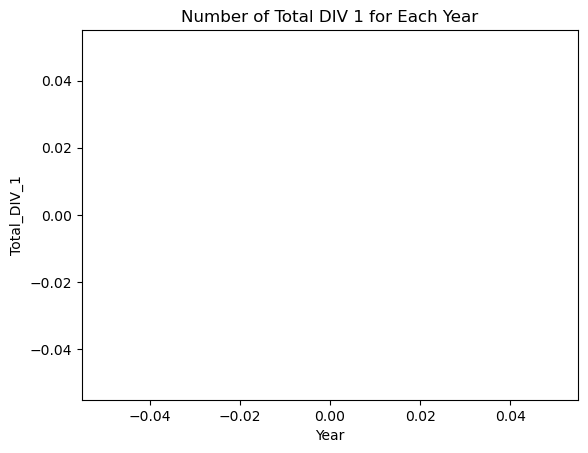

In [116]:
# 7. Trend of performance in the consecutive years

# Group the data by year and calculate the total number of DIV 1
group = df_uce.groupby('YEAR')['TOTAL_DIV_1'].sum().reset_index()

# Sort the data by year in ascending order
sorted_data = group.sort_values('YEAR')

# Create a bar plot
plt.bar(sorted_data['YEAR'], sorted_data['TOTAL_DIV_1'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Total_DIV_1')
plt.title('Number of Total DIV 1 for Each Year')

# Display the plot
plt.show()



In [117]:
# 8. Dominant Schools in the top 10 for all the years

# Group the data by year and school, and calculate the total performance
grouped_data = df_uce.groupby(['YEAR', 'SCHOOL'])['PERFORMANCE'].sum().reset_index()

# Filter the schools that appear in the top 10 for all years
top_performing_schools = grouped_data.groupby('SCHOOL').filter(lambda x: len(x) == len(df_uce['YEAR'].unique()))

# Count the occurrences of each school
school_counts = top_performing_schools['SCHOOL'].value_counts()

# Get the dominant schools that appear in all top 10 rankings
dominant_schools = school_counts[school_counts == len(df_uce['YEAR'].unique())]

# Print the dominant schools
for school in dominant_schools.index:
    print(f"Dominant School: {school}")


In [118]:
# 9. Dominant DISTRICTS in the top 10 for all the years

# Group the data by year, district, and school, and calculate the total performance
grouped_data = df_uce.groupby(['YEAR', 'DISTRICT', 'SCHOOL'])['PERFORMANCE'].sum().reset_index()

# Filter the districts that appear in the top 10 for all years
top_performing_districts = grouped_data.groupby('DISTRICT').filter(lambda x: len(x) == len(df_uce['YEAR'].unique()))

# Count the occurrences of each district
district_counts = top_performing_districts['DISTRICT'].value_counts()

# Get the dominant districts that appear in all top 10 rankings
dominant_districts = district_counts[district_counts == len(df_uce['YEAR'].unique())]

# Print the dominant districts
for district in dominant_districts.index:
    print(f"Dominant District: {district}")


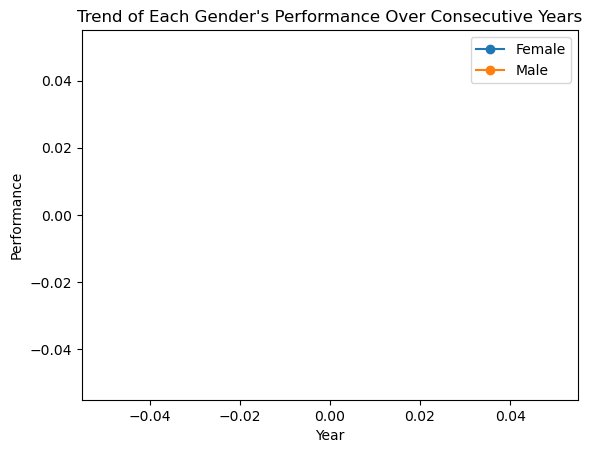

In [119]:
# 10. Trend of each Gender's performance in the Consecutive Years.

# Calculate the total performance for each gender and year
df_uce['FEMALE_PERFORMANCE'] = df_uce['FEMALE_%_DIV1'] + df_uce['FEMALE_%_DIV2'] + df_uce['FEMALE_%_DIV3'] + df_uce['FEMALE_%_DIV4'] + df_uce['FEMALE_%_DIV7']
df_uce['MALE_PERFORMANCE'] = df_uce['MALE_%_DIV1'] + df_uce['MALE_%_DIV2'] + df_uce['MALE_%_DIV3'] + df_uce['MALE_%_DIV4'] + df_uce['MALE_%_DIV7']

# Group the data by year and calculate the average performance for each gender
grouped_data = df_uce.groupby('YEAR')[['FEMALE_PERFORMANCE', 'MALE_PERFORMANCE']].mean()

# Create line plots for each gender's performance
plt.plot(grouped_data.index, grouped_data['FEMALE_PERFORMANCE'], marker='o', label='Female')
plt.plot(grouped_data.index, grouped_data['MALE_PERFORMANCE'], marker='o', label='Male')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Performance')
plt.title('Trend of Each Gender\'s Performance Over Consecutive Years')

# Add a legend
plt.legend()

# Display the plot
plt.show()
